In [1]:
import numpy as np
from qiskit import Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from math import pi, acos, sqrt, sin, asin
from qiskit.tools.visualization import circuit_drawer
import time

%matplotlib inline

In [2]:
def sprinkler(qc,q,a):
    qc.x(q[2])
    qc.x(a[0])
    qc.x(a[1])
    qc.x(a[2])
    qc.ccx(q[0],q[1],a[0])
    qc.ccx(q[1],q[2],a[1])
    qc.ccx(q[0],q[2],a[2])
    qc.mct([a[0],a[1],a[2],q[3]],a[3])
    qc.ccx(q[0],q[2],a[2])
    qc.ccx(q[1],q[2],a[1])
    qc.ccx(q[0],q[1],a[0])
    qc.x(a[2])
    qc.x(a[1])
    qc.x(a[0])
    qc.x(q[2])


In [3]:
def prepare():
    q=QuantumRegister(4)
    qc=QuantumCircuit(q)
    theta0=2.0*asin(sqrt(0.55))
    theta1=2.0*asin(sqrt(0.3))
    theta2=2.0*asin(sqrt(0.7))
    qc.ry(theta0,q[0])
    qc.ry(theta1,q[1])
    qc.ry(theta2,q[2])
    qc.h(q[3])
    return qc

prep=prepare().to_gate()
invprep=prep.inverse()

In [4]:
def grover():
    q=QuantumRegister(4)
    a=QuantumRegister(5)
    qc=QuantumCircuit(q,a)
    qc.x(a[3])
    qc.h(a[3])
    sprinkler(qc,q,a)
    qc.h(a[3])
    qc.x(a[3])
    qc.append(invprep,range(4))    
    for i in range(q.size):
        qc.x(q[i])
    qc.mct([q[0],q[1],q[2],q[3]],a[4])
    qc.z(a[4])
    qc.mct([q[0],q[1],q[2],q[3]],a[4])
    for i in range(q.size):
        qc.x(q[i])
    qc.ry(2*pi,q[0]) 
    qc.append(prep,range(4)) 
    return qc
    
ggrover = grover().to_gate()

In [5]:
#mpe
q=QuantumRegister(4)
a=QuantumRegister(5)
c=ClassicalRegister(3)

qc=QuantumCircuit(q,a,c)
qc.append(prep, range(4))
for i in range(2):
    qc.append(ggrover,range(9))
qc.measure([q[0],q[1],q[2]],c)

In [6]:
#map
q=QuantumRegister(4)
a=QuantumRegister(5)
c=ClassicalRegister(2)

qc=QuantumCircuit(q,a,c)
qc.append(prep, range(4))
for i in range(1):
    qc.append(ggrover,range(9))
qc.measure([q[0],q[2]],c)

In [7]:
backend = Aer.get_backend('qasm_simulator')
start = time.time()

job_sim = execute(qc, backend, shots=100000)
end = time.time()
print(end - start)

result_sim = job_sim.result()

0.0743098258972168


In [8]:
counts  = result_sim.get_counts()
newcounts={}
for key, value in counts.items():
    newkey=key[::-1] # reverses the key
    newcounts[newkey]=value
newcounts

{'00': 13746, '10': 2149, '01': 44689, '11': 39416}

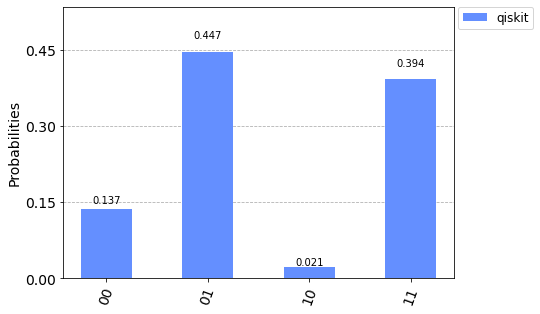

In [9]:
fig=plot_histogram([newcounts],sort='asc',legend=['qiskit'])
fig

In [11]:
fig.savefig("qmpe.pdf", bbox_inches='tight')